<a href="https://colab.research.google.com/github/rajeevjammy/Reviews_ChatGPT-Analysis-Python-RJ/blob/main/RajeevChatGPT_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: create a df for https://docs.google.com/spreadsheets/d/1EbvACk41L5qvkxolv99VZKpfB6OyDxhYclNiJADBYA0/edit?gid=1456881266#gid=1456881266

import pandas as pd

sheet_id = '1EbvACk41L5qvkxolv99VZKpfB6OyDxhYclNiJADBYA0'
sheet_name = 'Sheet1'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

df = pd.read_csv(url)
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [ ]:
# prompt: Standardize column names Handle missing values

# standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Handle missing values - Simple imputation (replace with mean)
#df = df.fillna(df.mean())

# You might want to use other imputation methods depending on your data and needs,
# e.g., median, mode, or more sophisticated techniques.
# df = df.fillna(df.median()) # Replace with median
# df = df.fillna(df.mode().iloc[0]) # Replace with mode


In [ ]:
# prompt: Ensure data types are appropriate

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Convert numerical columns to appropriate types (e.g., int, float)
# Depending on your data, you might need more specific conversions.
for col in numerical_cols:
  # Attempt to convert to integer if possible, otherwise float
  try:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(int)
  except ValueError:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

# Convert categorical columns to 'category' dtype for memory efficiency and better handling
for col in categorical_cols:
  df[col] = df[col].astype('category')

print("\nData types after conversion:")
df.dtypes

# You might also want to inspect unique values in categorical columns to check for inconsistencies
# for col in categorical_cols:
#   print(f"\nUnique values in {col}:")
#   print(df[col].unique())



Data types after conversion:


,0
review_id,category
review,category
ratings,int64
review_date,category


In [ ]:
# prompt: Calculate sentiment polarity and subjectivity using NLP techniques

!pip install -q textblob
from textblob import TextBlob

# Assuming the column containing text is named 'text_column'. Replace 'text_column' with the actual column name.
# If you don't have a specific text column, you'll need to identify or create one from your data.
# For this example, let's assume you have a column named 'feedback' with text data.
# If you don't have a text column, you'll need to adjust the code to use the column that contains your text.

# Check if a potential text column exists (e.g., 'text', 'feedback', 'description').
# You might need to adjust this based on your actual data.
text_col_candidates = ['text', 'feedback', 'comment', 'review', 'description']
text_col = None
for col in text_col_candidates:
  if col in df.columns:
    text_col = col
    break

if text_col is None:
  print("Could not find a suitable text column. Please identify the column with text data.")
else:
  # Function to get sentiment polarity
  def get_polarity(text):
    if isinstance(text, str):
      return TextBlob(text).sentiment.polarity
    return 0.0 # Return 0 for non-string values or missing data

  # Function to get sentiment subjectivity
  def get_subjectivity(text):
    if isinstance(text, str):
      return TextBlob(text).sentiment.subjectivity
    return 0.0 # Return 0 for non-string values or missing data


  # Apply the functions to the text column to create new 'polarity' and 'subjectivity' columns
  df['polarity'] = df[text_col].apply(get_polarity)
  df['subjectivity'] = df[text_col].apply(get_subjectivity)

  print("\nDataFrame with sentiment analysis:")
  print(df[[text_col, 'polarity', 'subjectivity']].head())


DataFrame with sentiment analysis:
                                              review  polarity  subjectivity
0                                               good    0.7000      0.600000
1                                               good    0.7000      0.600000
2                                           nice app    0.6000      1.000000
3                                           nice, ig    0.6000      1.000000
4  this is a great app, the bot is so accurate to...    0.4125      0.542949


In [ ]:
# prompt: Categorize reviews based on polarity into positive, neutral, or negative

# Function to categorize polarity
def categorize_polarity(polarity):
  if polarity > 0:
    return 'positive'
  elif polarity < 0:
    return 'negative'
  else:
    return 'neutral'

# Apply the categorization function to the 'polarity' column
if text_col is not None:
  df['sentiment_category'] = df['polarity'].apply(categorize_polarity)

  print("\nDataFrame with sentiment categories:")
  print(df[[text_col, 'polarity', 'sentiment_category']].head())
else:
  print("Cannot categorize sentiment without a text column.")


DataFrame with sentiment categories:
                                              review  polarity  \
0                                               good    0.7000   
1                                               good    0.7000   
2                                           nice app    0.6000   
3                                           nice, ig    0.6000   
4  this is a great app, the bot is so accurate to...    0.4125   

  sentiment_category  
0           positive  
1           positive  
2           positive  
3           positive  
4           positive  


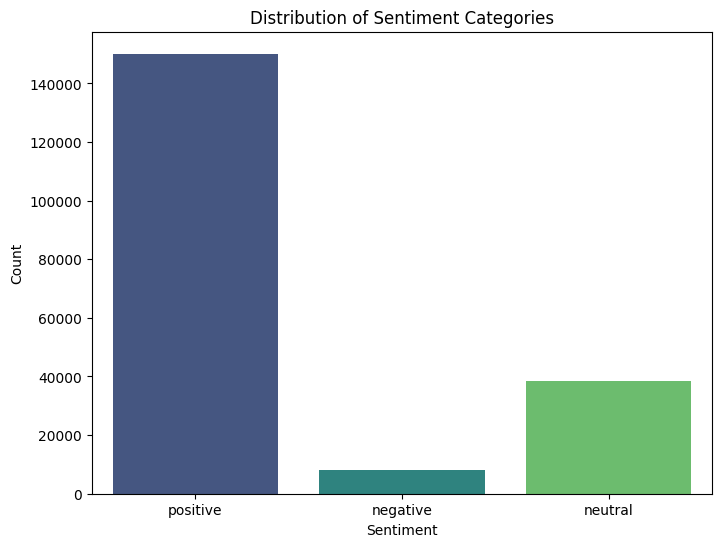

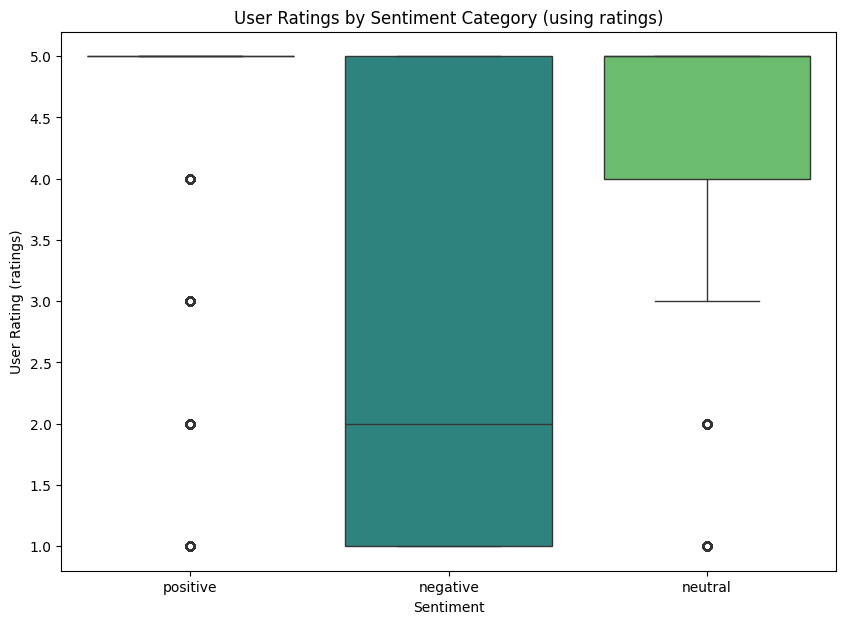

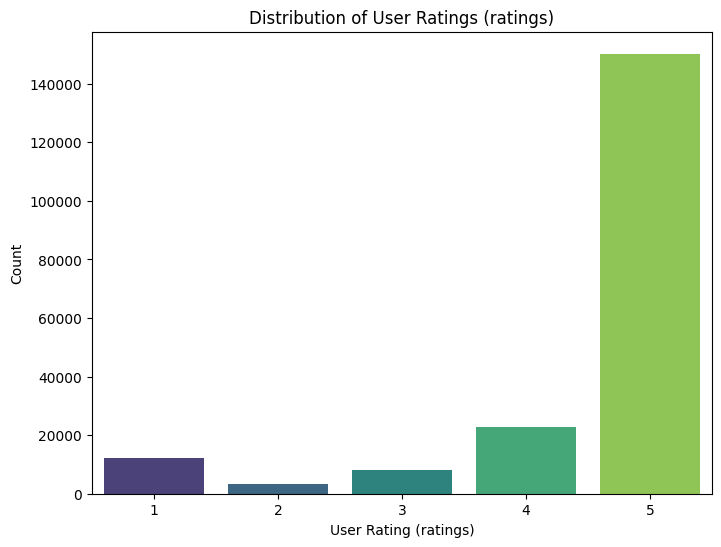

In [ ]:
# prompt: Visualize sentiment distributions and compare them with user ratings

!pip install -q matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a column named 'rating' representing user ratings.
# Replace 'rating' with the actual column name for user ratings in your DataFrame.
rating_col = 'ratings' # Replace with your actual rating column name

if text_col is not None and rating_col in df.columns:
  # Visualize the distribution of sentiment categories
  plt.figure(figsize=(8, 6))
  sns.countplot(x='sentiment_category', data=df, palette='viridis')
  plt.title('Distribution of Sentiment Categories')
  plt.xlabel('Sentiment')
  plt.ylabel('Count')
  plt.show()

  # Visualize the relationship between sentiment polarity and user ratings
  plt.figure(figsize=(10, 7))
  sns.boxplot(x='sentiment_category', y=rating_col, data=df, palette='viridis')
  plt.title(f'User Ratings by Sentiment Category (using {rating_col})')
  plt.xlabel('Sentiment')
  plt.ylabel(f'User Rating ({rating_col})')
  plt.show()

  # You can also visualize the distribution of ratings directly
  plt.figure(figsize=(8, 6))
  sns.countplot(x=rating_col, data=df, palette='viridis')
  plt.title(f'Distribution of User Ratings ({rating_col})')
  plt.xlabel(f'User Rating ({rating_col})')
  plt.ylabel('Count')
  plt.show()

  # Scatter plot of polarity vs. rating (optional, can be noisy with large datasets)
  # plt.figure(figsize=(10, 7))
  # sns.scatterplot(x='polarity', y=rating_col, data=df, alpha=0.5)
  # plt.title(f'Sentiment Polarity vs. User Rating ({rating_col})')
  # plt.xlabel('Sentiment Polarity')
  # plt.ylabel(f'User Rating ({rating_col})')
  # plt.show()

elif text_col is None:
  print("Cannot visualize sentiment distributions without a text column for sentiment analysis.")
elif rating_col not in df.columns:
    print(f"Cannot visualize sentiment vs. ratings. '{rating_col}' column not found in the DataFrame.")
    print(f"Available columns are: {df.columns.tolist()}")


Number of positively rated reviews (rating >= 4): 173112


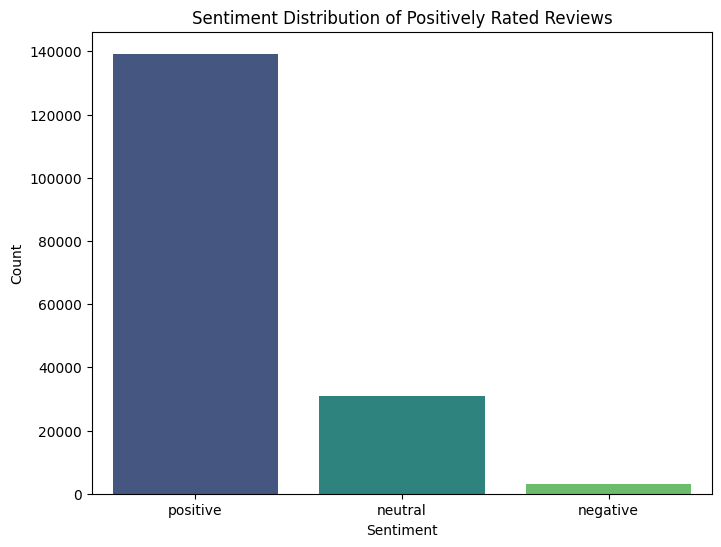


First 5 positively rated reviews and their sentiment:
                                              review  ratings  polarity  \
0                                               good        5    0.7000   
1                                               good        5    0.7000   
2                                           nice app        5    0.6000   
3                                           nice, ig        5    0.6000   
4  this is a great app, the bot is so accurate to...        5    0.4125   

  sentiment_category  
0           positive  
1           positive  
2           positive  
3           positive  
4           positive  


In [ ]:
# prompt: Filter and analyze positively rated reviews

# Filter for positively rated reviews (e.g., rating >= 4 if on a scale of 1-5)
# Adjust the condition based on your actual rating scale and what you consider "positively rated"
if rating_col in df.columns:
  positively_rated_reviews = df[df[rating_col] >= 4].copy() # Assuming 4 and 5 are positive ratings

  print(f"\nNumber of positively rated reviews (rating >= 4): {len(positively_rated_reviews)}")

  # Analyze sentiment distribution within positively rated reviews
  if text_col is not None:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sentiment_category', data=positively_rated_reviews, palette='viridis')
    plt.title('Sentiment Distribution of Positively Rated Reviews')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    # Display the first few positively rated reviews and their sentiment
    print("\nFirst 5 positively rated reviews and their sentiment:")
    print(positively_rated_reviews[[text_col, rating_col, 'polarity', 'sentiment_category']].head())

    # You can further analyze these reviews, e.g., identify common words, themes, etc.
    # This would require additional NLP steps like tokenization, stop word removal, etc.

  else:
    print("Cannot analyze sentiment of positively rated reviews without a text column.")

else:
  print(f"Cannot filter and analyze positively rated reviews. '{rating_col}' column not found in the DataFrame.")
  print(f"Available columns are: {df.columns.tolist()}")

In [ ]:
# prompt: perform text analysis Extract frequently mentioned positive keywords and phrases

from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK data (if not already downloaded)
try:
  nltk.data.find('tokenizers/punkt')
except LookupError:
  nltk.download('punkt')
try:
  nltk.data.find('corpora/stopwords')
except LookupError:
  nltk.download('stopwords')
try:
  nltk.data.find('tokenizers/punkt_tab')
except LookupError:
  nltk.download('punkt_tab')


if text_col is not None:
  # Filter for positive reviews based on sentiment category
  positive_reviews_sentiment = df[df['sentiment_category'] == 'positive'].copy()

  print(f"\nNumber of positive reviews based on sentiment analysis: {len(positive_reviews_sentiment)}")

  if len(positive_reviews_sentiment) > 0:
    # Combine all positive text into a single string
    all_positive_text = " ".join(positive_reviews_sentiment[text_col].astype(str))

    # Tokenize the text
    tokens = word_tokenize(all_positive_text)

    # Convert to lowercase
    tokens = [word.lower() for word in tokens]

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Optional: Remove numbers
    tokens = [word for word in tokens if word.isalpha()]

    # Count the frequency of each word
    word_counts = Counter(tokens)

    # Get the most common words (e.g., top 20)
    most_common_words = word_counts.most_common(20)

    print("\nFrequently mentioned positive keywords:")
    for word, count in most_common_words:
        print(f"{word}: {count}")

    # For phrases, you might need N-gram analysis. Let's do simple bigrams.
    from nltk.util import bigrams

    # Create bigrams
    bigram_list = list(bigrams(tokens))

    # Count bigram frequencies
    bigram_counts = Counter(bigram_list)

    # Get the most common bigrams (e.g., top 10)
    most_common_bigrams = bigram_counts.most_common(10)

    print("\nFrequently mentioned positive phrases (bigrams):")
    for bigram, count in most_common_bigrams:
        print(f"{' '.join(bigram)}: {count}")

  else:
      print("No positive reviews found based on sentiment analysis to extract keywords and phrases.")

else:
  print("Cannot extract keywords and phrases without a text column.")


Number of positive reviews based on sentiment analysis: 150122

Frequently mentioned positive keywords:
app: 44147
good: 39005
best: 18310
nice: 13700
great: 11893
ai: 10151
helpful: 9705
amazing: 8627
love: 8565
chatgpt: 8231
useful: 7506
really: 7108
like: 6841
use: 6189
excellent: 6119
awesome: 5037
chat: 4773
much: 3973
ever: 3809
gpt: 3706

Frequently mentioned positive phrases (bigrams):
good app: 6115
good good: 5229
best app: 4890
app good: 4320
nice app: 3353
great app: 3124
chat gpt: 2589
best ai: 2463
good nice: 2088
app best: 1873


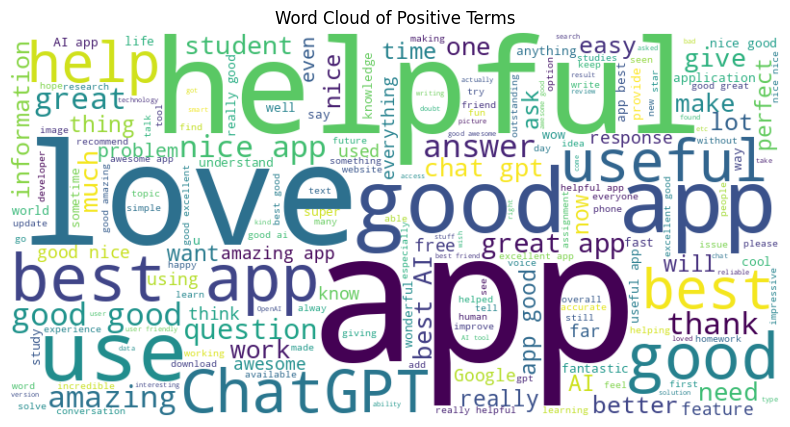

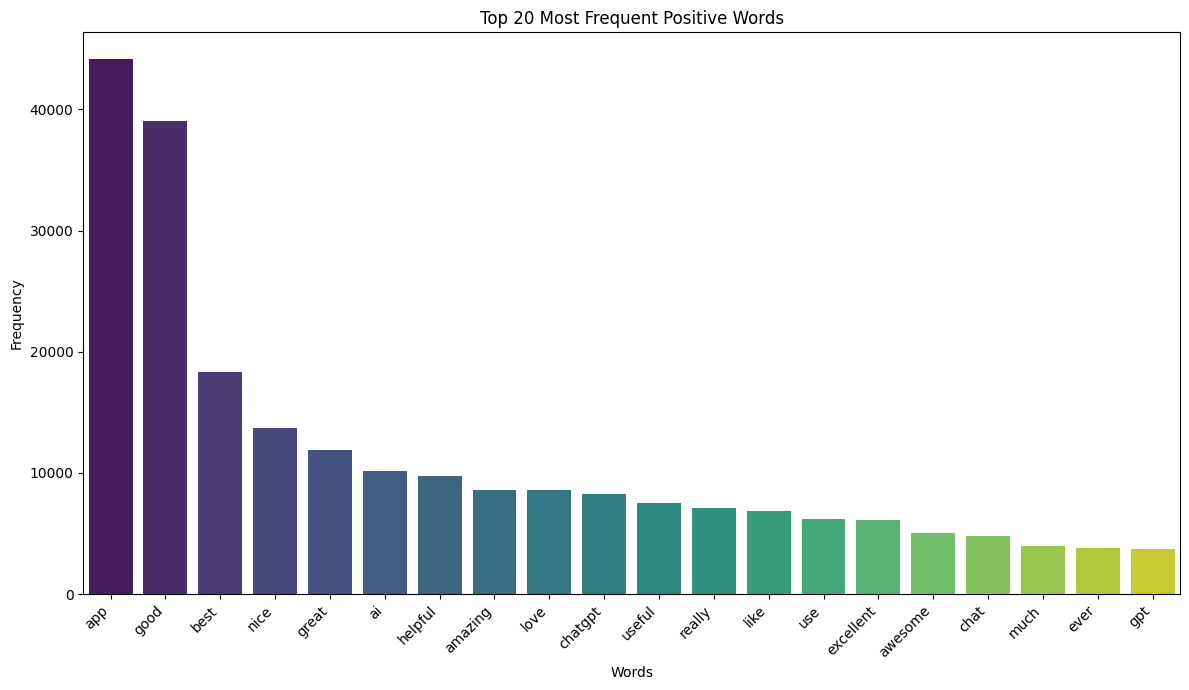

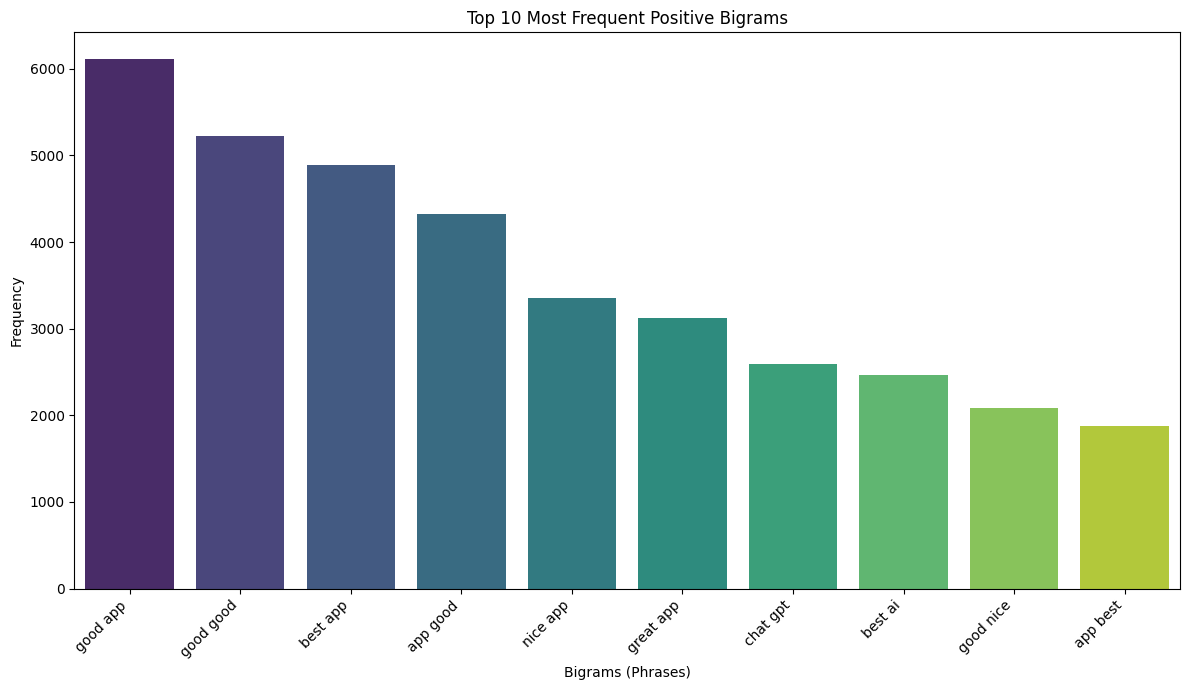

In [ ]:
# prompt: Visualize positive terms using methods like word clouds or frequency plots

!pip install -q wordcloud

from wordcloud import WordCloud

if text_col is not None and len(positive_reviews_sentiment) > 0:
  # Generate a word cloud from the combined positive text
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_text)

  # Display the word cloud
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word Cloud of Positive Terms')
  plt.show()

  # Visualize the frequency of the most common words (Frequency Plot)
  words, counts = zip(*most_common_words)

  plt.figure(figsize=(12, 7))
  sns.barplot(x=list(words), y=list(counts), palette='viridis')
  plt.title('Top 20 Most Frequent Positive Words')
  plt.xlabel('Words')
  plt.ylabel('Frequency')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

  # Visualize the frequency of the most common bigrams (Frequency Plot)
  bigrams_str = [' '.join(bigram) for bigram, count in most_common_bigrams]
  bigram_counts_list = [count for bigram, count in most_common_bigrams]

  plt.figure(figsize=(12, 7))
  sns.barplot(x=bigrams_str, y=bigram_counts_list, palette='viridis')
  plt.title('Top 10 Most Frequent Positive Bigrams')
  plt.xlabel('Bigrams (Phrases)')
  plt.ylabel('Frequency')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

else:
  print("Cannot visualize positive terms. No positive reviews found or text column is missing.")


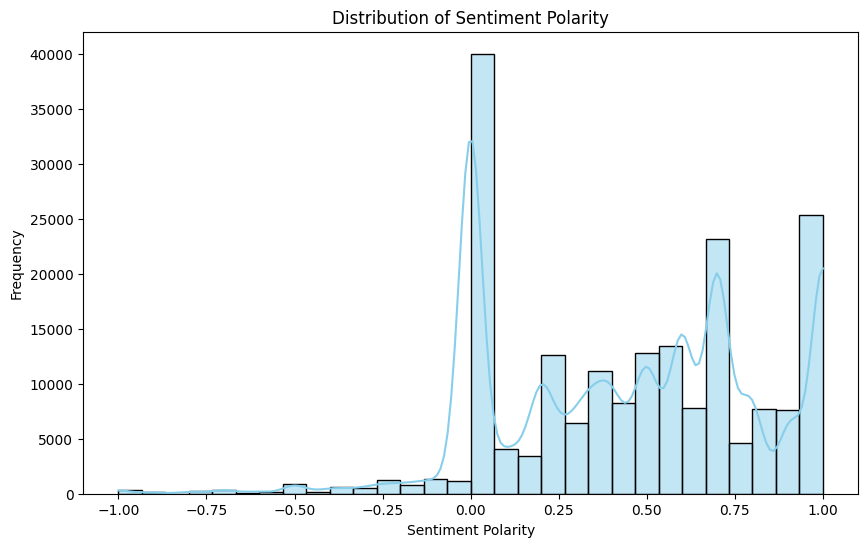

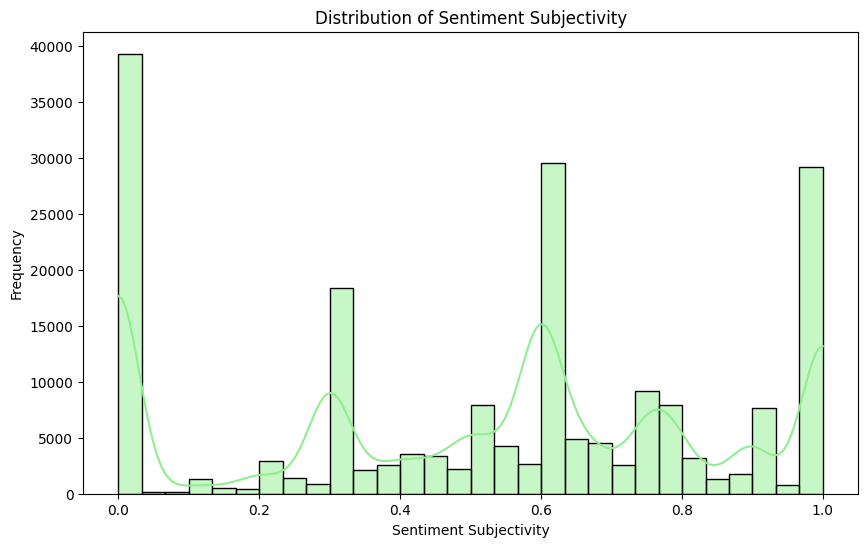

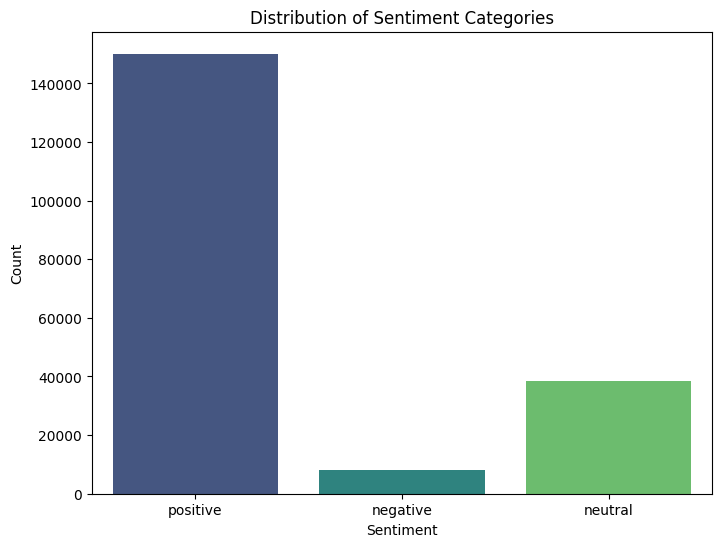

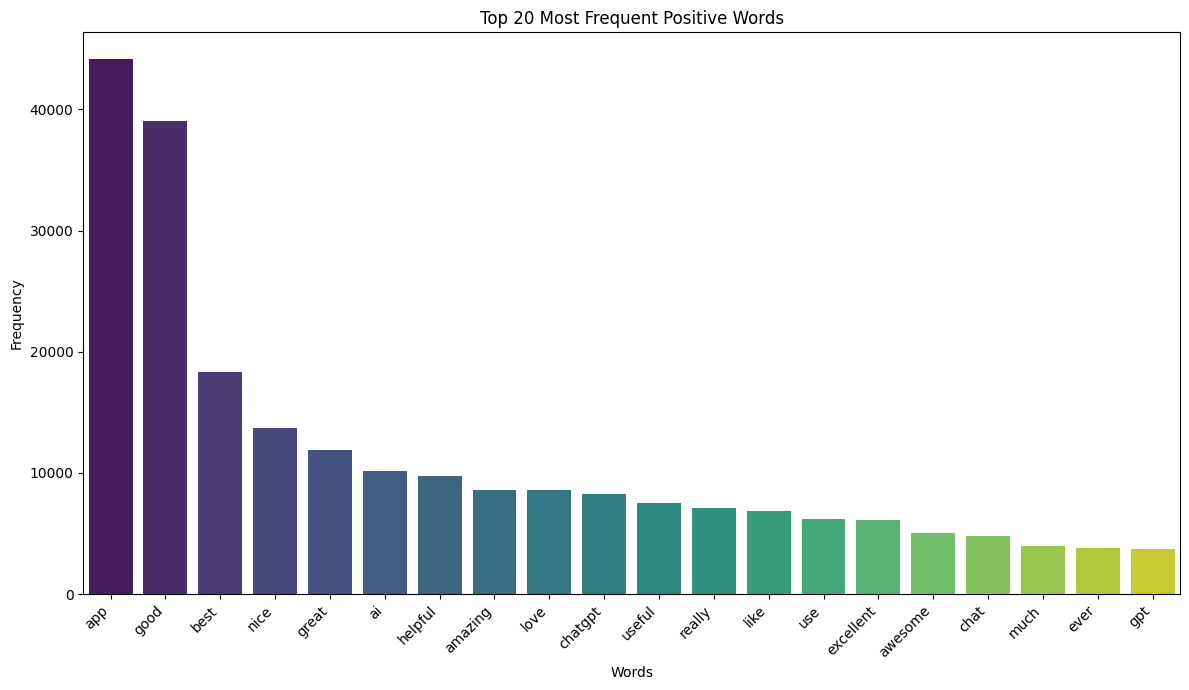

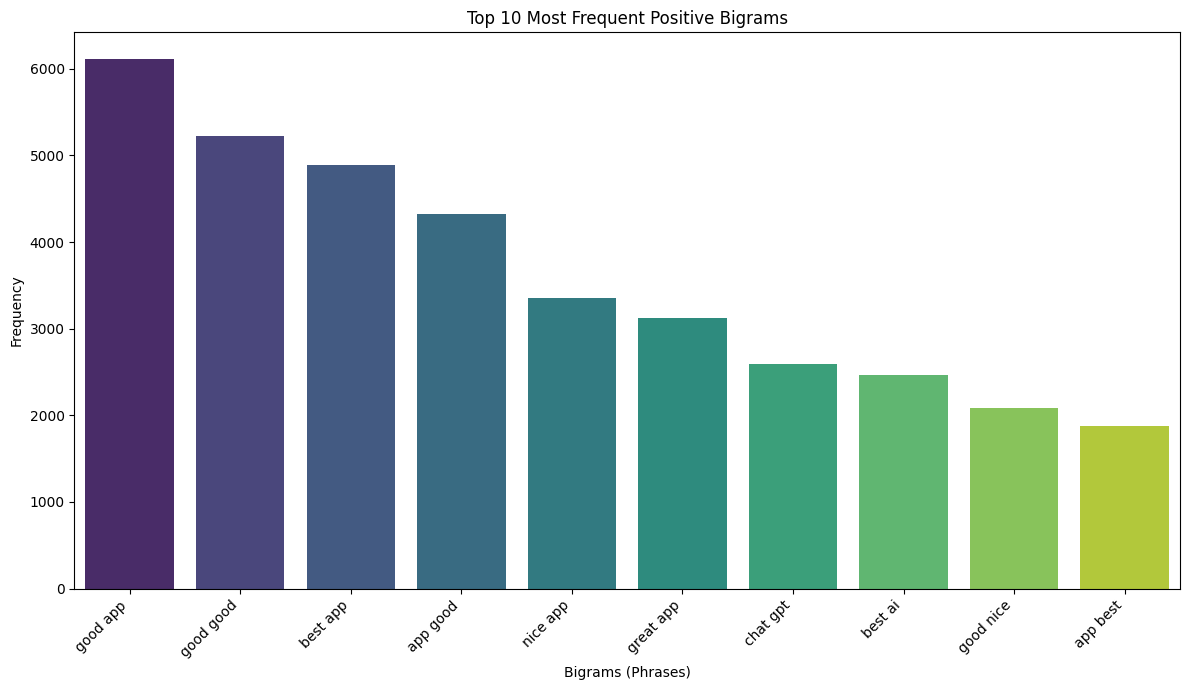

In [ ]:
# prompt: Create relevant charts (e.g., histograms, bar plots) to display sentiment trends, subjectivity distribution, and keyword frequencies

if text_col is not None:
  # Histogram of Sentiment Polarity Distribution
  plt.figure(figsize=(10, 6))
  sns.histplot(df['polarity'], bins=30, kde=True, color='skyblue')
  plt.title('Distribution of Sentiment Polarity')
  plt.xlabel('Sentiment Polarity')
  plt.ylabel('Frequency')
  plt.show()

  # Histogram of Sentiment Subjectivity Distribution
  plt.figure(figsize=(10, 6))
  sns.histplot(df['subjectivity'], bins=30, kde=True, color='lightgreen')
  plt.title('Distribution of Sentiment Subjectivity')
  plt.xlabel('Sentiment Subjectivity')
  plt.ylabel('Frequency')
  plt.show()

  # Bar plot of Sentiment Category Distribution (already included in previous output, but included here for completeness)
  plt.figure(figsize=(8, 6))
  sns.countplot(x='sentiment_category', data=df, palette='viridis')
  plt.title('Distribution of Sentiment Categories')
  plt.xlabel('Sentiment')
  plt.ylabel('Count')
  plt.show()

  # If you have extracted keywords and phrases, you can visualize their frequencies
  if 'most_common_words' in locals() and len(most_common_words) > 0:
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=list(words), y=list(counts), palette='viridis')
    plt.title('Top 20 Most Frequent Positive Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

  if 'most_common_bigrams' in locals() and len(most_common_bigrams) > 0:
    bigrams_str = [' '.join(bigram) for bigram, count in most_common_bigrams]
    bigram_counts_list = [count for bigram, count in most_common_bigrams]

    plt.figure(figsize=(12, 7))
    sns.barplot(x=bigrams_str, y=bigram_counts_list, palette='viridis')
    plt.title('Top 10 Most Frequent Positive Bigrams')
    plt.xlabel('Bigrams (Phrases)')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
  print("Cannot create sentiment and keyword charts without a text column.")